# Final Project DSI

In [34]:
# Import standard libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [116]:
# Setting a specific seed value
random.seed(42)  # You can use any integer as the seed 

In [117]:
# Load the data 

Df =  pd.read_csv('C:/Users/NEWPC/DSI/team_project/Project/data.csv', header = 0)

Df.head()  # Notes: There is issue with features names having spaces. We will fix this in the next step.

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [118]:
# Features Name Fix (Refined)/  fix column names for pipeline compatibility

Df.columns = [col.strip().replace(' ', '_') for col in Df.columns]
Df.head()

Bankrupt?  ROA(C)_before_interest_and_depreciation_before_interest  \
0          1                                           0.370594         
1          1                                           0.464291         
2          1                                           0.426071         
3          1                                           0.399844         
4          1                                           0.465022         

   ROA(A)_before_interest_and_%_after_tax  \
0                                0.424389   
1                                0.538214   
2                                0.499019   
3                                0.451265   
4                                0.538432   

   ROA(B)_before_interest_and_depreciation_after_tax  Operating_Gross_Margin  \
0                                           0.405750                0.601457   
1                                           0.516730                0.610235   
2                                           0.472295                0.601450   
3                                           0.457733                0.583541   
4                                           0.522298                0.598783   

   Realized_Sales_Gross_Margin  Operating_Profit_Rate  \
0                     0.601457               0.998969   
1                     0.610235               0.998946   
2                     0.601364               0.998857   
3                     0.583541               0.998700   
4                     0.598783               0.998973   

   Pre-tax_net_Interest_Rate  After-tax_net_Interest_Rate  \
0                   0.796887                     0.808809   
1                   0.797380                     0.809301   
2                   0.796403                     0.808388   
3                   0.796967                     0.808966   
4                   0.797366                     0.809304   

   Non-industry_income_and_expenditure/revenue  ...  \
0                                     0.302646  ...   
1                                     0.303556  ...   
2                                     0.302035  ...   
3                                     0.303350  ...   
4                                     0.303475  ...   

   Net_Income_to_Total_Assets  Total_assets_to_GNP_price  No-credit_Interval  \
0                    0.716845                   0.009219            0.622879   
1                    0.795297                   0.008323            0.623652   
2                    0.774670                   0.040003            0.623841   
3                    0.739555                   0.003252            0.622929   
4                    0.795016                   0.003878            0.623521   

   Gross_Profit_to_Sales  Net_Income_to_Stockholder's_Equity  \
0               0.601453                            0.827890   
1               0.610237                            0.839969   
2               0.601449                            0.836774   
3               0.583538                            0.834697   
4               0.598782                            0.839973   

   Liability_to_Equity  Degree_of_Financial_Leverage_(DFL)  \
0             0.290202                            0.026601   
1             0.283846                            0.264577   
2             0.290189                            0.026555   
3             0.281721                            0.026697   
4             0.278514                            0.024752   

   Interest_Coverage_Ratio_(Interest_expense_to_EBIT)  Net_Income_Flag  \
0                                           0.564050                 1   
1                                           0.570175                 1   
2                                           0.563706                 1   
3                                           0.564663                 1   
4                                           0.575617                 1   

   Equity_to_Liability  
0             0.016469  
1             0.020794  
2           

# Data Inspection:

In [119]:
# Data types

Df.info()  

# Notes: the data types are float64 and int64 which are suitable for our analysis. 
# No further conversion is needed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt?                                                6819 non-null   int64  
 1   ROA(C)_before_interest_and_depreciation_before_interest  6819 non-null   float64
 2   ROA(A)_before_interest_and_%_after_tax                   6819 non-null   float64
 3   ROA(B)_before_interest_and_depreciation_after_tax        6819 non-null   float64
 4   Operating_Gross_Margin                                   6819 non-null   float64
 5   Realized_Sales_Gross_Margin                              6819 non-null   float64
 6   Operating_Profit_Rate                                    6819 non-null   float64
 7   Pre-tax_net_Interest_Rate                                6819 non-null   float64
 8   After-tax_net_Interest_Rate 

In [120]:
Df.isnull()

Bankrupt?  ROA(C)_before_interest_and_depreciation_before_interest  \
0         False                                              False         
1         False                                              False         
2         False                                              False         
3         False                                              False         
4         False                                              False         
...         ...                                                ...         
6814      False                                              False         
6815      False                                              False         
6816      False                                              False         
6817      False                                              False         
6818      False                                              False         

      ROA(A)_before_interest_and_%_after_tax  \
0                                      False   
1                                      False   
2                                      False   
3                                      False   
4                                      False   
...                                      ...   
6814                                   False   
6815                                   False   
6816                                   False   
6817                                   False   
6818                                   False   

      ROA(B)_before_interest_and_depreciation_after_tax  \
0                                                 False   
1                                                 False   
2                                                 False   
3                                                 False   
4                                                 False   
...                                                 ...   
6814                                              False   
6815                                              False   
6816                                              False   
6817                                              False   
6818                                              False   

      Operating_Gross_Margin  Realized_Sales_Gross_Margin  \
0                      False                        False   
1                      False                        False   
2                      False                        False   
3                      False                        False   
4                      False                        False   
...                      ...                          ...   
6814                   False                        False   
6815                   False                        False   
6816                   False                        False   
6817                   False                        False   
6818                   False                        False   

      Operating_Profit_Rate  Pre-tax_net_Interest_Rate  \
0                     False                      False   
1                     False                      False   
2                     False                      False   
3                     False                      False   
4                     False                      False   
...                     ...                        ...   
6814                  False                      False   
6815                  False                      False   
6816                  False                      False   
6817                  False                      False   
6818                  False                      False   

      After-tax_net_Interest_Rate  \
0                           False   
1                           False   
2                           False   
3                           False   
4                           False   
...                           ...   
6814                        False   
6815                        False   
6816                        False   
6817   

In [121]:
# Missing values count
print(Df.isnull().sum())  #  No missing values found in the dataset.

Bankrupt?                                                  0
ROA(C)_before_interest_and_depreciation_before_interest    0
ROA(A)_before_interest_and_%_after_tax                     0
ROA(B)_before_interest_and_depreciation_after_tax          0
Operating_Gross_Margin                                     0
                                                          ..
Liability_to_Equity                                        0
Degree_of_Financial_Leverage_(DFL)                         0
Interest_Coverage_Ratio_(Interest_expense_to_EBIT)         0
Net_Income_Flag                                            0
Equity_to_Liability                                        0
Length: 96, dtype: int64


In [122]:
# Duplicate rows count
print("Number of duplicate rows:", Df.duplicated().sum()) # No duplicate rows found in the dataset.

Number of duplicate rows: 0


In [123]:
# Column  Count, Mean,Std Dev, Min, Max, 25%, 50% and 75% percentiles

Df.describe()

Bankrupt?  ROA(C)_before_interest_and_depreciation_before_interest  \
count  6819.000000                                        6819.000000         
mean      0.032263                                           0.505180         
std       0.176710                                           0.060686         
min       0.000000                                           0.000000         
25%       0.000000                                           0.476527         
50%       0.000000                                           0.502706         
75%       0.000000                                           0.535563         
max       1.000000                                           1.000000         

       ROA(A)_before_interest_and_%_after_tax  \
count                             6819.000000   
mean                                 0.558625   
std                                  0.065620   
min                                  0.000000   
25%                                  0.535543   
50%                                  0.559802   
75%                                  0.589157   
max                                  1.000000   

       ROA(B)_before_interest_and_depreciation_after_tax  \
count                                        6819.000000   
mean                                            0.553589   
std                                             0.061595   
min                                             0.000000   
25%                                             0.527277   
50%                                             0.552278   
75%                                             0.584105   
max                                             1.000000   

       Operating_Gross_Margin  Realized_Sales_Gross_Margin  \
count             6819.000000                  6819.000000   
mean                 0.607948                     0.607929   
std                  0.016934                     0.016916   
min                  0.000000                     0.000000   
25%                  0.600445                     0.600434   
50%                  0.605997                     0.605976   
75%                  0.613914                     0.613842   
max                  1.000000                     1.000000   

       Operating_Profit_Rate  Pre-tax_net_Interest_Rate  \
count            6819.000000                6819.000000   
mean                0.998755                   0.797190   
std                 0.013010                   0.012869   
min                 0.000000                   0.000000   
25%                 0.998969                   0.797386   
50%                 0.999022                   0.797464   
75%                 0.999095                   0.797579   
max                 1.000000                   1.000000   

       After-tax_net_Interest_Rate  \
count                  6819.000000   
mean                      0.809084   
std                       0.013601   
min                       0.000000   
25%                       0.809312   
50%                       0.809375   
75%                       0.809469   
max                       1.000000   

       Non-industry_income_and_expenditure/revenue  ...  \
count                                  6819.000000  ...   
mean                                      0.303623  ...   
std                                       0.011163  ...   
min                                       0.000000  ...   
25%                                       0.303466  ...   
50%                                       0.303525  ...   
75%                                       0.303585  ...   
max                                       1.000000  ...   

       Net_Income_to_Total_Assets  Total_assets_to_GNP_price  \
count                 6819.000000               6.819000e+03   
mean                     0.807760               1.862942e+07   
std                      0.040332               3.764501e+08   
min                      0.000000               0.000000e+00   
25%                      0.7

# Principal Component Analysis (PCA): 
Principal Component Analysis (PCA) is a great choice for dimensionality reduction when we have a large number of features and want to retain the most informative ones for our model.

- Standardization is a crucial preprocessing step, especially before applying PCA, as PCA is highly sensitive to the    scale of the features.
- scaler = StandardScaler(): An instance of the scaler is created.
- scaler.fit_transform(X): This does two things:
- fit: It calculates the mean and standard deviation for every feature (column) in X.
- transform: It then scales the data so that each feature has a mean of 0 and a standard deviation of 1. The standardized data is stored in X_scaled.

PCA transforms the original features into a new, smaller set of features (called Principal Components) while attempting to retain as much information (variance) as possible.

- pca = PCA(n_components=0.95): This is the key setting. Instead of specifying a fixed number of components (e.g., n_components=10), setting it to 0.95 (which is between 0 and 1.0) tells PCA to select the minimum number of components necessary to capture 95% of the total variance in the original data.

- pca.fit_transform(X_scaled):

- fit: It calculates the principal components from the standardized data X_scaled.

- transform: It projects the data onto these selected principal components, resulting in the reduced dataset X_pca.

In [124]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# step1: Separate features and target
X = Df.drop(columns=['Bankrupt?'])  # Replace 'target' with your actual label column
y = Df['Bankrupt?']

#step-2: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step3 : Apply PCA to retain 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Check how many components were retained
print(f"Number of components retained: {pca.n_components_}")

Number of components retained: 53


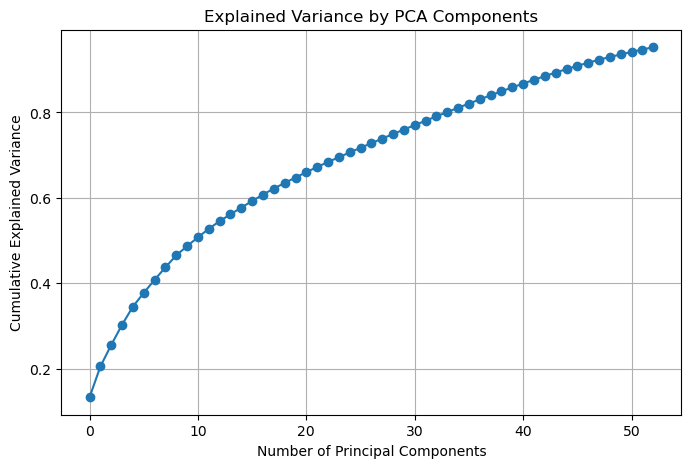

In [125]:
 # visualize the PCA projection

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

In [127]:
# Apply PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Generate component names
component_names = [f'PC{i+1}' for i in range(pca.n_components_)]
print("Principal Component Names:")
print(component_names)



Principal Component Names:
['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52', 'PC53']


In [128]:
import pandas as pd
import numpy as np

# Assuming X is ouroriginal feature matrix (before scaling)
original_feature_names = X.columns

# Create a DataFrame showing feature contributions to each principal component
loadings = pd.DataFrame(
    pca.components_.T,  # transpose so rows = features, columns = PCs
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=original_feature_names
)

# Display top contributing features for each component
for i in range(pca.n_components_):
    print(f"\nTop features for PC{i+1}:")
    print(loadings.iloc[:, i].abs().sort_values(ascending=False).head(10))


Top features for PC1:
ROA(A)_before_interest_and_%_after_tax                     0.239805
Persistent_EPS_in_the_Last_Four_Seasons                    0.239479
ROA(C)_before_interest_and_depreciation_before_interest    0.238807
ROA(B)_before_interest_and_depreciation_after_tax          0.236934
Net_profit_before_tax/Paid-in_capital                      0.234156
Per_Share_Net_profit_before_tax_(Yuan_¥)                   0.232885
Net_Income_to_Total_Assets                                 0.230167
Operating_Profit_Per_Share_(Yuan_¥)                        0.218169
Operating_profit/Paid-in_capital                           0.217415
Net_Value_Per_Share_(A)                                    0.199073
Name: PC1, dtype: float64

Top features for PC2:
Current_Liabilities/Equity                     0.319393
Current_Liability_to_Equity                    0.319393
Liability_to_Equity                            0.317403
Borrowing_dependency                           0.289457
Inventory_and_accounts_r

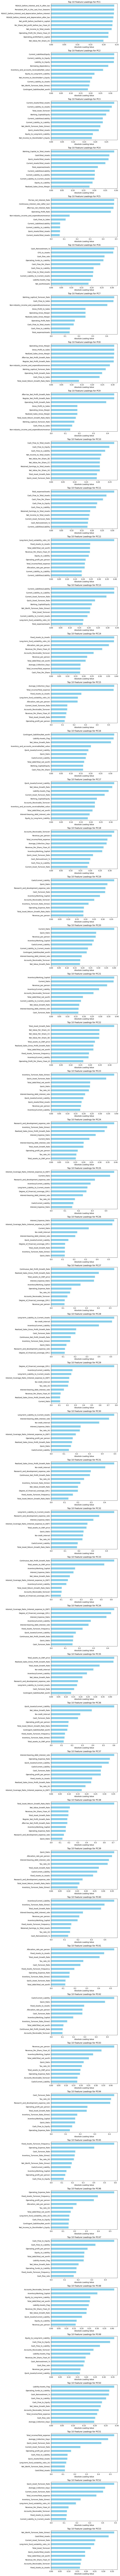

In [129]:
import matplotlib.pyplot as plt

# Plot Top Feature Loadings per Principal Component

# Create loadings DataFrame
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=X.columns  # original feature names
)

# Plot top 10 features for each component
num_components = pca.n_components_
fig, axes = plt.subplots(nrows=num_components, ncols=1, figsize=(10, 4 * num_components))

if num_components == 1:
    axes = [axes]  # ensure iterable

for i, ax in enumerate(axes):
    pc = f'PC{i+1}'
    top_features = loadings[pc].abs().sort_values(ascending=False).head(10)
    top_features.plot(kind='barh', ax=ax, color='skyblue')
    ax.set_title(f'Top 10 Feature Loadings for {pc}')
    ax.set_xlabel('Absolute Loading Value')
    ax.invert_yaxis()

plt.tight_layout()
plt.show()

In [157]:
# Feature Selection via PCA Loadings

import numpy as np

# Set a threshold for "significant" contribution
loading_threshold = 0.35 # You can tune this value Threshold: Start with 0.3 or 0.4; lower it if you want more features, raise it for stricter selection

# Create a boolean mask for features with high absolute loadings in any PC
high_loading_mask = (loadings.abs() >= loading_threshold).any(axis=1)

# Select those feature names
selected_features = loadings.index[high_loading_mask].tolist()

print(f"Selected {len(selected_features)} features:")
print(selected_features)

# Subset your original DataFrame
X_selected = X[selected_features]
print(f"Shape of original feature set: {X.shape}")
print(f"Shape of selected feature set: {X_selected.shape}")

Selected 47 features:
['Operating_Profit_Rate', 'Pre-tax_net_Interest_Rate', 'After-tax_net_Interest_Rate', 'Non-industry_income_and_expenditure/revenue', 'Continuous_interest_rate_(after_tax)', 'Operating_Expense_Rate', 'Research_and_development_expense_rate', 'Interest-bearing_debt_interest_rate', 'Tax_rate_(A)', 'Realized_Sales_Gross_Profit_Growth_Rate', 'Operating_Profit_Growth_Rate', 'After-tax_Net_Profit_Growth_Rate', 'Regular_Net_Profit_Growth_Rate', 'Continuous_Net_Profit_Growth_Rate', 'Total_Asset_Growth_Rate', 'Net_Value_Growth_Rate', 'Total_Asset_Return_Growth_Rate_Ratio', 'Current_Ratio', 'Quick_Ratio', 'Interest_Expense_Ratio', 'Long-term_fund_suitability_ratio_(A)', 'Accounts_Receivable_Turnover', 'Average_Collection_Days', 'Inventory_Turnover_Rate_(times)', 'Fixed_Assets_Turnover_Frequency', 'Net_Worth_Turnover_Rate_(times)', 'Revenue_per_person', 'Operating_profit_per_person', 'Allocation_rate_per_person', 'Quick_Assets/Current_Liability', 'Cash/Current_Liability', 'Inv

In [158]:
X_selected.head(10)

Operating_Profit_Rate  Pre-tax_net_Interest_Rate  \
0               0.998969                   0.796887   
1               0.998946                   0.797380   
2               0.998857                   0.796403   
3               0.998700                   0.796967   
4               0.998973                   0.797366   
5               0.998758                   0.796903   
6               0.998993                   0.797012   
7               0.999009                   0.797449   
8               0.998961                   0.797414   
9               0.999001                   0.797404   

   After-tax_net_Interest_Rate  Non-industry_income_and_expenditure/revenue  \
0                     0.808809                                     0.302646   
1                     0.809301                                     0.303556   
2                     0.808388                                     0.302035   
3                     0.808966                                     0.303350   
4                     0.809304                                     0.303475   
5                     0.808771                                     0.303116   
6                     0.808960                                     0.302814   
7                     0.809362                                     0.303545   
8                     0.809338                                     0.303584   
9                     0.809320                                     0.303483   

   Continuous_interest_rate_(after_tax)  Operating_Expense_Rate  \
0                              0.780985            1.256969e-04   
1                              0.781506            2.897851e-04   
2                              0.780284            2.361297e-04   
3                              0.781241            1.078888e-04   
4                              0.781550            7.890000e+09   
5                              0.781069            1.571500e-04   
6                              0.781180            3.984834e-04   
7                              0.781621            9.000000e+09   
8                              0.781598            1.687136e-04   
9                              0.781574            5.820000e+09   

   Research_and_development_expense_rate  Interest-bearing_debt_interest_rate  \
0                                    0.0                             0.000725   
1                                    0.0                             0.000647   
2                             25500000.0                             0.000790   
3                                    0.0                             0.000449   
4                                    0.0                             0.000686   
5                                    0.0                             0.000716   
6                            730000000.0                             0.000805   
7                             50900000.0                             0.000630   
8                                    0.0                             0.000737   
9                                    0.0                             0.000672   

   Tax_rate_(A)  Realized_Sales_Gross_Profit_Growth_Rate  ...  \
0      0.000000                                 0.022102  ...   
1      0.000000                                 0.022080  ...   
2      0.000000                                 0.022760  ...   
3      0.000000                                 0.022046  ...   
4      0.000000                                 0.022096  ...   
5      0.000000                                 0.021565  ...   
6      0.000000                                 0.022112  ...   
7      0.157607                                 0.022114  ...   
8      0.005871                                 0.022128  ...   
9      0.392449                                 0.022118  ...   

   Working_capitcal_Turnover_Rate  Cash_Turnover_Rate  Cash_Flow_to_Sales  \
0                        0.593831        4.580000e+08            0.671568   
1                        0.

In [159]:
Df_selected = pd.concat([X_selected, y], axis=1)
Df_selected.head()

Operating_Profit_Rate  Pre-tax_net_Interest_Rate  \
0               0.998969                   0.796887   
1               0.998946                   0.797380   
2               0.998857                   0.796403   
3               0.998700                   0.796967   
4               0.998973                   0.797366   

   After-tax_net_Interest_Rate  Non-industry_income_and_expenditure/revenue  \
0                     0.808809                                     0.302646   
1                     0.809301                                     0.303556   
2                     0.808388                                     0.302035   
3                     0.808966                                     0.303350   
4                     0.809304                                     0.303475   

   Continuous_interest_rate_(after_tax)  Operating_Expense_Rate  \
0                              0.780985            1.256969e-04   
1                              0.781506            2.897851e-04   
2                              0.780284            2.361297e-04   
3                              0.781241            1.078888e-04   
4                              0.781550            7.890000e+09   

   Research_and_development_expense_rate  Interest-bearing_debt_interest_rate  \
0                                    0.0                             0.000725   
1                                    0.0                             0.000647   
2                             25500000.0                             0.000790   
3                                    0.0                             0.000449   
4                                    0.0                             0.000686   

   Tax_rate_(A)  Realized_Sales_Gross_Profit_Growth_Rate  ...  \
0           0.0                                 0.022102  ...   
1           0.0                                 0.022080  ...   
2           0.0                                 0.022760  ...   
3           0.0                                 0.022046  ...   
4           0.0                                 0.022096  ...   

   Cash_Turnover_Rate  Cash_Flow_to_Sales  Fixed_Assets_to_Assets  \
0        4.580000e+08            0.671568                0.424206   
1        2.490000e+09            0.671570                0.468828   
2        7.610000e+08            0.671571                0.276179   
3        2.030000e+09            0.671519                0.559144   
4        8.240000e+08            0.671563                0.309555   

   Equity_to_Long-term_Liability  Cash_Flow_to_Equity  \
0                       0.126549             0.312905   
1                       0.120916             0.314163   
2                       0.117922             0.314515   
3                       0.120760             0.302382   
4                       0.110933             0.311567   

   Total_assets_to_GNP_price  No-credit_Interval  \
0                   0.009219            0.622879   
1                   0.008323            0.623652   
2                   0.040003            0.623841   
3                   0.003252            0.622929   
4                   0.003878            0.623521   

   Degree_of_Financial_Leverage_(DFL)  \
0                            0.026601   
1                            0.264577   
2                            0.026555   
3                            0.026697   
4                            0.024752   

   Interest_Coverage_Ratio_(Interest_expense_to_EBIT)  Bankrupt?  
0                                           0.564050           1  
1                                           0.570175           1  
2                                           0.563706           1  
3                                           0.564663           1  
4                                           0.575617           1  

[5 rows x 48 columns]

In [160]:
Df["Operating_Profit_Rate"]

0       0.998969
1       0.998946
2       0.998857
3       0.998700
4       0.998973
          ...   
6814    0.998992
6815    0.998992
6816    0.998984
6817    0.999074
6818    0.998080
Name: Operating_Profit_Rate, Length: 6819, dtype: float64

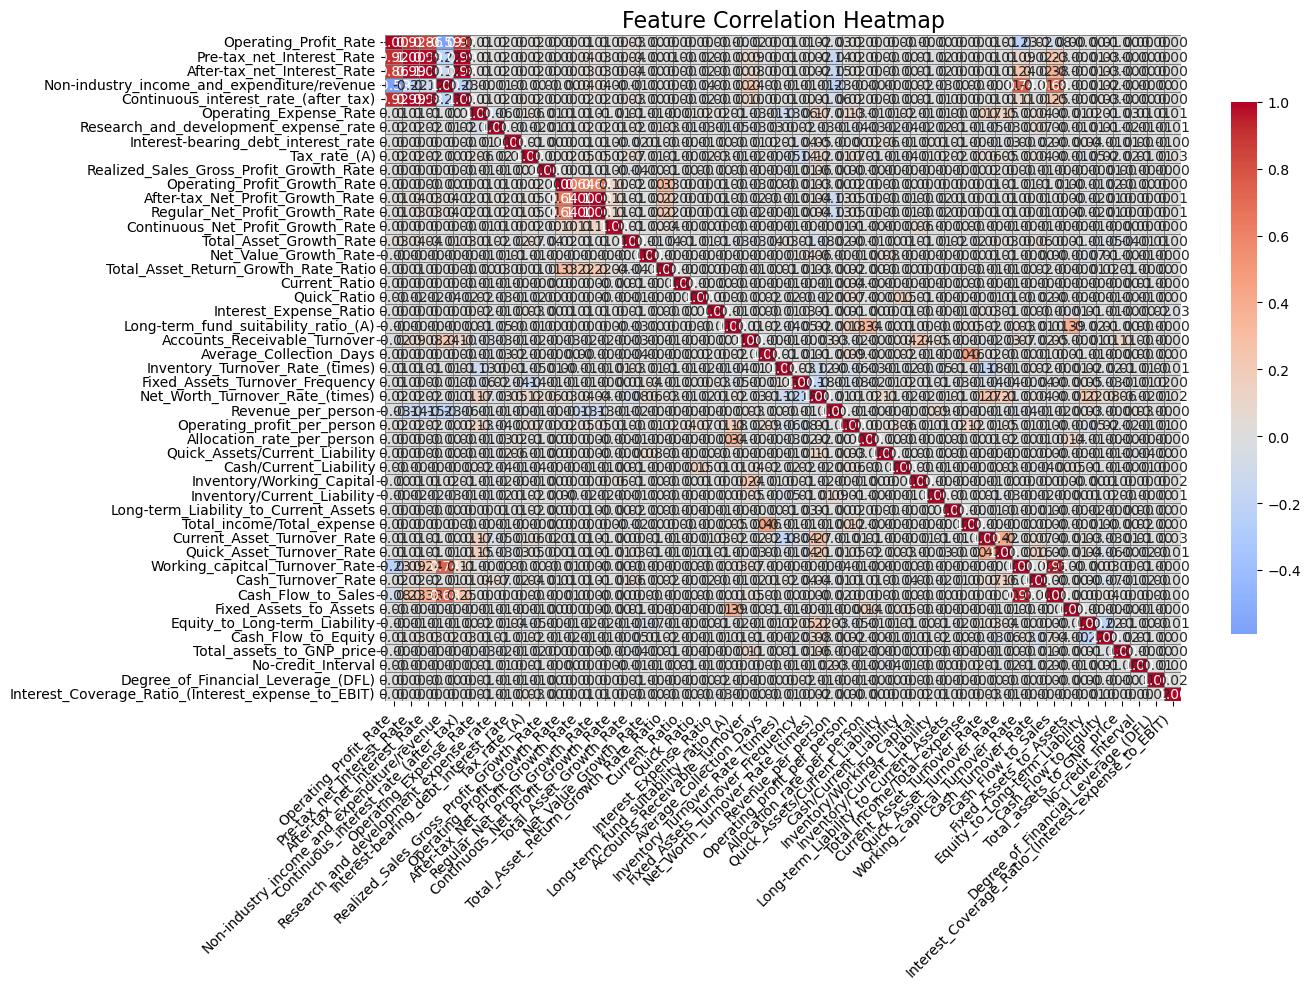

In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the target column (adjust name if needed)
features_only = X_selected

# Compute correlation matrix
corr_matrix = features_only.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            linewidths=0.5, linecolor='gray', cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



Notes: we can drop some corelated colums because of highly corelated to Operating_Profit_Rate: 
- Pre-tax_net_Interest_Rate	
- After-tax_net_Interest_Rate	
- Continuous_interest_rate_(after_tax)


## Variance in Feature Selection
What Is Variance in Feature Selection?: 
It performs a simple but effective technique for feature selection based on the variance of each feature. The goal is to remove features that are constant or nearly constant, as they provide little to no useful information for a machine learning model.

Only keep features whose values vary enough — specifically, with a variance greater than 0.1 (example)
This helps: 
- Remove uninformative features that don’t change much across samples.
- Reduce noise and improve model generalization.
- Speed up training by trimming irrelevant dimensions.
 
 This is an effective technique for feature selection based on the variance of each feature. The goal is to remove features that are constant or nearly constant, as they provide little to no useful information for a machine learning model.

- selector.get_support(): This method returns a boolean mask (a list of True/False values). True indicates a retained feature, and False indicates a discarded feature.

- This mask is used to select the corresponding column names from the original DataFrame's columns (X.columns).

- Finally, a new DataFrame X_selected is created by subsetting the original data X using the list of selected_features. This ensures the new DataFrame retains the original structure, including column names.

- The output prints the number and names of the features that were kept and then displays the resulting DataFrame X_selected.

- Note: Features with zero variance (e.g., a column where every value is the same) are always removed by default, regardless of the threshold setting, as they have no predictive power.

In [162]:
# Variance-Based Feature Selection

from sklearn.feature_selection import VarianceThreshold

# Set threshold (e.g., 0.1)
selector = VarianceThreshold(threshold= 0.1)

# Fit on training data
X_var_filtered = selector.fit_transform(X)

# Get selected feature names
selected_features = X.columns[selector.get_support()].tolist()

print(f"Selected {len(selected_features)} features with variance > 0.1:")
print(selected_features)

# Subset original data
X_selected = X[selected_features]

X_selected

Selected 24 features with variance > 0.1:
['Operating_Expense_Rate', 'Research_and_development_expense_rate', 'Interest-bearing_debt_interest_rate', 'Revenue_Per_Share_(Yuan_¥)', 'Total_Asset_Growth_Rate', 'Net_Value_Growth_Rate', 'Current_Ratio', 'Quick_Ratio', 'Total_debt/Total_net_worth', 'Accounts_Receivable_Turnover', 'Average_Collection_Days', 'Inventory_Turnover_Rate_(times)', 'Fixed_Assets_Turnover_Frequency', 'Revenue_per_person', 'Allocation_rate_per_person', 'Quick_Assets/Current_Liability', 'Cash/Current_Liability', 'Inventory/Current_Liability', 'Long-term_Liability_to_Current_Assets', 'Current_Asset_Turnover_Rate', 'Quick_Asset_Turnover_Rate', 'Cash_Turnover_Rate', 'Fixed_Assets_to_Assets', 'Total_assets_to_GNP_price']


Operating_Expense_Rate  Research_and_development_expense_rate  \
0               1.256969e-04                           0.000000e+00   
1               2.897851e-04                           0.000000e+00   
2               2.361297e-04                           2.550000e+07   
3               1.078888e-04                           0.000000e+00   
4               7.890000e+09                           0.000000e+00   
...                      ...                                    ...   
6814            1.510213e-04                           4.500000e+09   
6815            5.220000e+09                           1.440000e+09   
6816            2.509312e-04                           1.039086e-04   
6817            1.236154e-04                           2.510000e+09   
6818            1.431695e-03                           0.000000e+00   

      Interest-bearing_debt_interest_rate  Revenue_Per_Share_(Yuan_¥)  \
0                            7.250725e-04                    0.017560   
1                            6.470647e-04                    0.021144   
2                            7.900790e-04                    0.005944   
3                            4.490449e-04                    0.014368   
4                            6.860686e-04                    0.029690   
...                                   ...                         ...   
6814                         1.790179e-04                    0.020766   
6815                         2.370237e-04                    0.023050   
6816                         0.000000e+00                    0.044255   
6817                         2.110211e-04                    0.031535   
6818                         5.900000e+08                    0.000665   

      Total_Asset_Growth_Rate  Net_Value_Growth_Rate  Current_Ratio  \
0                4.980000e+09               0.000327       0.002259   
1                6.110000e+09               0.000443       0.006016   
2                7.280000e+09               0.000396       0.011543   
3                4.880000e+09               0.000382       0.004194   
4                5.510000e+09               0.000439       0.006022   
...                       ...                    ...            ...   
6814             7.070000e+09               0.000450       0.010451   
6815             5.220000e+09               0.000445       0.009259   
6816             5.990000e+09               0.000435       0.038424   
6817             7.250000e+09               0.000529       0.012782   
6818             9.350000e+09               0.000519       0.051348   

      Quick_Ratio  Total_debt/Total_net_worth  Accounts_Receivable_Turnover  \
0        0.001208                    0.021266                      0.001814   
1        0.004039                    0.012502                      0.001286   
2        0.005348                    0.021248                      0.001495   
3        0.002896                    0.009572                      0.001966   
4        0.003727                    0.005150                      0.001449   
...           ...                         ...                           ...   
6814     0.005457                    0.006655                      0.000690   
6815     0.006741                    0.004623                      0.000655   
6816     0.035112                    0.001392                      0.001510   
6817     0.007256                    0.003816                      0.000716   
6818     0.040897                    0.000461                      0.000325   

      ...  Allocation_rate_per_person  Quick_Assets/Current_Liability  \
0     ...                    0.037135                        0.001997   
1     ...                    0.012335                        0.004136   
2     ...                    0.141016                        0.006302   
3     ...                    0.021320                        0.002961   
4     ...                    0.023988                        0.004275   
...   ...                         ..

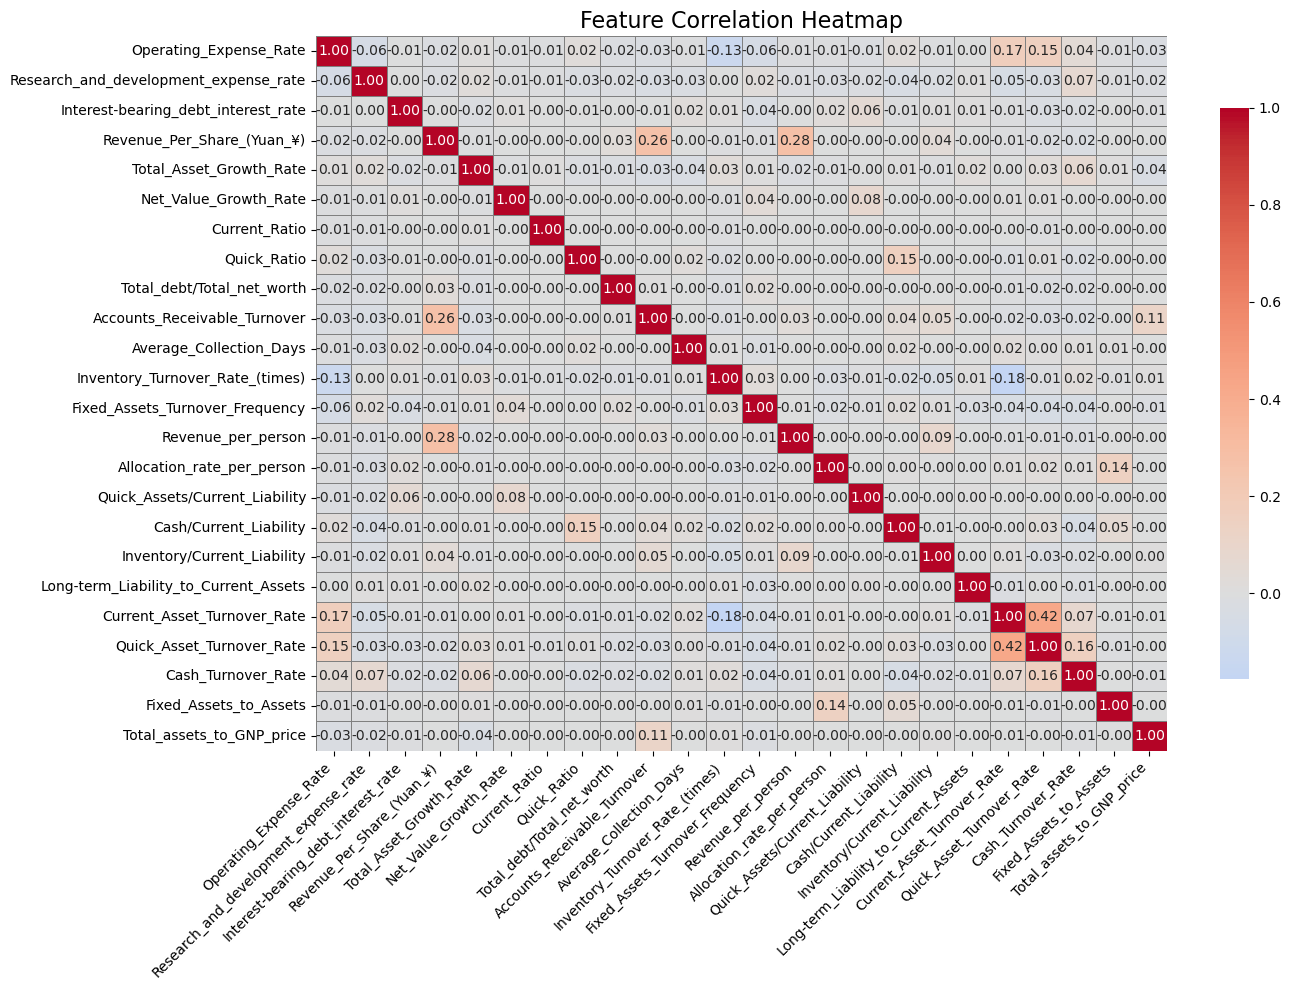

In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the target column (adjust name if needed)
features_only = X_selected

# Compute correlation matrix
corr_matrix = features_only.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            linewidths=0.5, linecolor='gray', cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

Notes: Why This Matters
• 	High correlation (> 0.8) between features may indicate redundancy
• 	Negative correlation can reveal inverse relationships
• 	Helps guide feature selection, dimensionality reduction, and model interpretability

When features are correlated in machine learning, they often carry redundant information, which can cause problems for some models, particularly linear ones, by making model parameters unstable and difficult to interpret. Conversely, models like tree-based algorithms are less affected performance-wise, but interpretability can still be an issue. While removing correlated features can simplify the model and improve performance, the decision depends on the specific model, the goal (prediction vs. interpretability), and the nature of the correlation. 

In [166]:
#Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 2: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Step 4: Evaluate
y_pred = model.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.50      0.02      0.04        51

    accuracy                           0.96      1364
   macro avg       0.73      0.51      0.51      1364
weighted avg       0.95      0.96      0.95      1364

Confusion Matrix:
[[1312    1]
 [  50    1]]


• Analysis of the Classification report:

 - Class 0 (Non-bankrupt) is predicted extremely well — almost perfect recall and precision.
 - Class 1 (Bankrupt) is severely underrepresented:
 - Only 1 out of 51 bankrupt companies was correctly predicted.
 - Recall = 0.02 means the model misses 98% of actual bankruptcies.
 - F1-score = 0.04 shows poor balance between precision and recall.

• Analysis of the Confusion Matrix Breakdown
 [1312    1]  → True Negatives / False Positives
 [  50    1]  → False Negatives / True Positives

- 1312 true negatives: Non-bankrupt companies correctly classified
- 50 false negatives: Bankrupt companies misclassified as non-bankrupt
- Only 1 true positive: One bankrupt company correctly identified

• Conclusion: What this tells us:
- Our model is biased toward the majority class (non-bankrupt).
- It achieves high overall accuracy (96%), but this is misleading due to class imbalance.
- Bankruptcy detection is failing, which is critical in real-world applications.

• What we can do to correct the class im balance: 
- Use resampling techniques RandomOverSampler and apply it before training and re-evaluate.
- we can also use Logistic Regression with Class Weighting. The class weighting technique helps the model pay more attention to the minority class (bankrupt companies) without duplicating data. But, down the road if we are going to apply more Machine Learning and deap Learning model, we meare going to face the class imbaalance issue. So we decided to fix it moving forward. That means we will upsample the data set toward the minority class.

In [ ]:
#  !pip install imbalanced-learn


In [167]:
# Resampling and Logistic Regression

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter

# Step 1: Resample to balance classes
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_selected, y)

print(f"After Upsampling: {Counter(y_resampled)}")

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 3: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Step 5: Evaluate
y_pred = model.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

After Upsampling: Counter({1: 6599, 0: 6599})
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.65      0.63      1334
           1       0.62      0.58      0.60      1306

    accuracy                           0.61      2640
   macro avg       0.62      0.61      0.61      2640
weighted avg       0.62      0.61      0.61      2640

Confusion Matrix:
[[872 462]
 [555 751]]


c:\Users\NEWPC\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\NEWPC\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Key Insights:
- Balanced performance across both classes — a huge leap from the earlier model that barely detected bankruptcies.
- Recall for Class 1 (Bankrupt) jumped from 0.02 to 0.58 — now catching over half of actual bankruptcies.
- F1-scores are now comparable for both classes, indicating a much healthier trade-off between precision and recall.


In [168]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Build pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# Step 2: Define hyperparameter grid
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'logreg__solver': ['liblinear', 'lbfgs']  # Solvers compatible with L2 penalty
}

# Step 3: Grid search with cross-validation
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_selected, y)

# Step 4: Best model and evaluation
print("Best Parameters:", grid.best_params_)

# Predict using best model
y_pred = grid.predict(X_selected)

print("\nClassification Report:")
print(classification_report(y, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

Best Parameters: {'logreg__C': 1, 'logreg__solver': 'lbfgs'}

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.68      0.80      6599
           1       0.06      0.57      0.10       220

    accuracy                           0.67      6819
   macro avg       0.52      0.62      0.45      6819
weighted avg       0.95      0.67      0.78      6819

Confusion Matrix:
[[4463 2136]
 [  94  126]]


In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 2: Optional scaling (Random Forest doesn't require it, but you can include it for consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)

# Step 4: Evaluate
y_pred = rf_model.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.00      0.00      0.00        51

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.96      0.94      1364

Confusion Matrix:
[[1313    0]
 [  51    0]]


c:\Users\NEWPC\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\NEWPC\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\NEWPC\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [ ]:
# !pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   - -------------------------------------- 4.7/124.9 MB 28.6 MB/s eta 0:00:05
   ---- ----------------------------------- 12.8/124.9 MB 32.3 MB/s eta 0:00:04
   ------ --------------------------------- 20.2/124.9 MB 32.7 MB/s eta 0:00:04
   -------- ------------------------------- 27.8/124.9 MB 32.0 MB/s eta 0:00:04
   ---------- ----------------------------- 34.3/124.9 MB 33.6 MB/s eta 0:00:03
   ---------- ----------------------------- 34.3/124.9 MB 33.6 MB/s eta 0:00:03
   -------------- ------------------------- 44.3/124.9 MB 27.9 MB/s eta 0:00:03
   ---------------- ----------------------- 50.3/124.9 MB 26.7 MB/s eta 0:00:03
   ------------------ --------------------- 58.5/124.9 MB 27.4 MB/s eta 0:00:03
   --------------------- ------------------ 66.6/124.9 MB 27.4 MB/s eta 0:00:03
   ------------------------- -------------- 78.9/124.9 MB 29.6 MB/s eta 0:00:02
   ------------------------- -------------- 80.5/1

In [171]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 2: Scale features (optional for XGBoost, but consistent)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=10, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Step 4: Evaluate
y_pred = xgb_model.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

c:\Users\NEWPC\miniconda3\envs\dsi_participant\lib\site-packages\xgboost\core.py:158: UserWarning: [21:02:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.42      0.16      0.23        51

    accuracy                           0.96      1364
   macro avg       0.69      0.57      0.60      1364
weighted avg       0.95      0.96      0.95      1364

Confusion Matrix:
[[1302   11]
 [  43    8]]


In [36]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Apply SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 3: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Step 5: Evaluate
y_pred = xgb_model.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

c:\Users\NEWPC\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1334
           1       0.93      0.98      0.95      1306

    accuracy                           0.95      2640
   macro avg       0.95      0.95      0.95      2640
weighted avg       0.95      0.95      0.95      2640

Confusion Matrix:
[[1240   94]
 [  29 1277]]


c:\Users\NEWPC\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


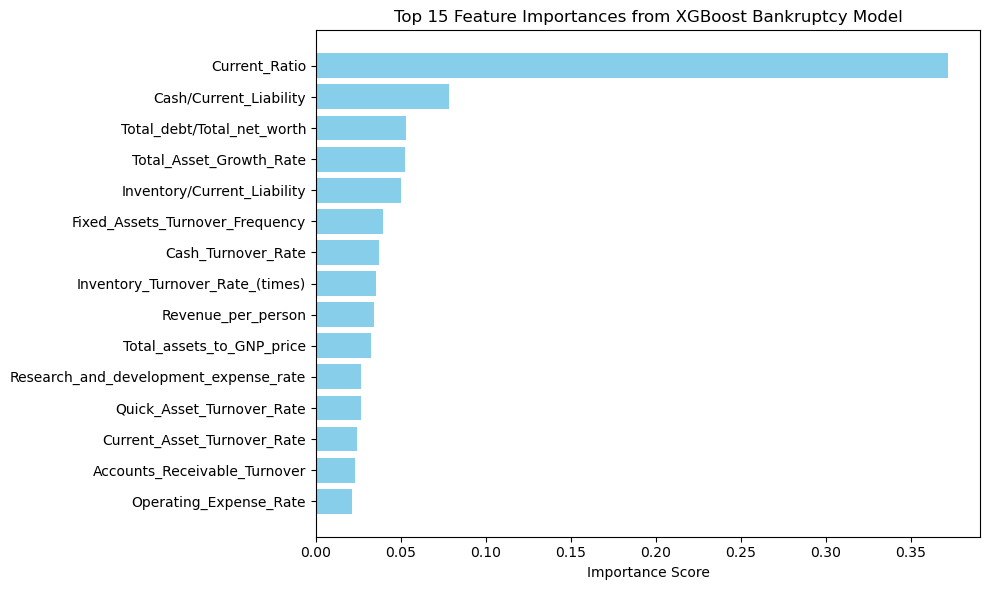

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Apply SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 3: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Step 5: Extract feature importances
importances = xgb_model.feature_importances_
feature_names = X_selected.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
top_features = importance_df.sort_values(by='Importance', ascending=False).head(15)

# Step 6: Plot
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'][::-1], top_features['Importance'][::-1], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Top 15 Feature Importances from XGBoost Bankruptcy Model')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Train initial XGBoost model on full feature set
xgb_full = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_full.fit(X_selected, y)

# Step 2: Extract top N features by importance
N = 15  # You can adjust this
importances = xgb_full.feature_importances_
feature_names = X_selected.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
top_features = importance_df.sort_values(by='Importance', ascending=False).head(N)['Feature'].tolist()

# Step 3: Subset original data to top features
X_top = X_selected[top_features]


# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Step 5: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Retrain XGBoost on reduced feature set
xgb_reduced = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_reduced.fit(X_train_scaled, y_train)

# Step 7: Evaluate
y_pred = xgb_reduced.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Using top 15 features for retraining.
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.33      0.04      0.07        51

    accuracy                           0.96      1364
   macro avg       0.65      0.52      0.53      1364
weighted avg       0.94      0.96      0.95      1364

Confusion Matrix:
[[1309    4]
 [  49    2]]


In [40]:
print(f"Using top {N} features for retraining.")

Using top 15 features for retraining.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Build pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

# Step 2: Define hyperparameter grid
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'logreg__penalty': ['l2'],            # L2 regularization
    'logreg__solver': ['lbfgs', 'liblinear']  # Solvers that support L2
}

# Step 3: Grid search with cross-validation
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_selected, y)

# Step 4: Best model and evaluation
print("Best Parameters:", grid.best_params_)

# Predict using best model
y_pred = grid.predict(X_selected)

print("\nClassification Report:")
print(classification_report(y, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

c:\Users\NEWPC\miniconda3\envs\dsi_participant\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\NEWPC\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\NEWPC\miniconda3\envs\dsi_participant\lib\site-packages\xgboost\core.py:158: UserWarning: [00:21:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "logreg__C", "logreg__solver" } are not used.

  warnings.warn(smsg, UserWarning)
PermutationExplainer explainer: 13199it [27:10,  8.

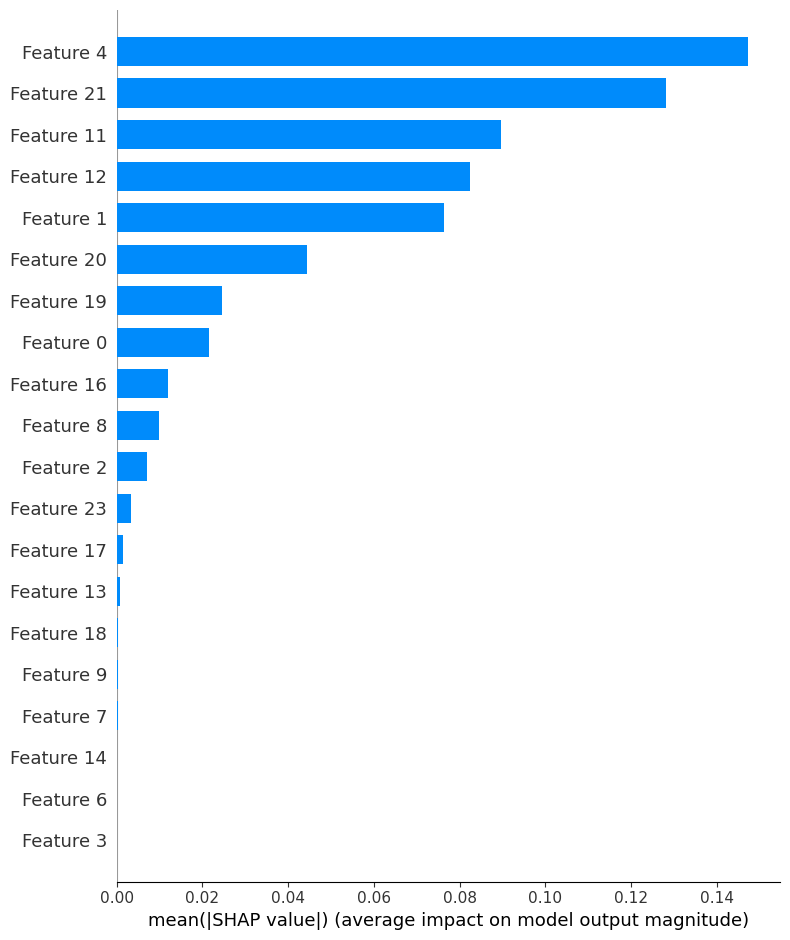

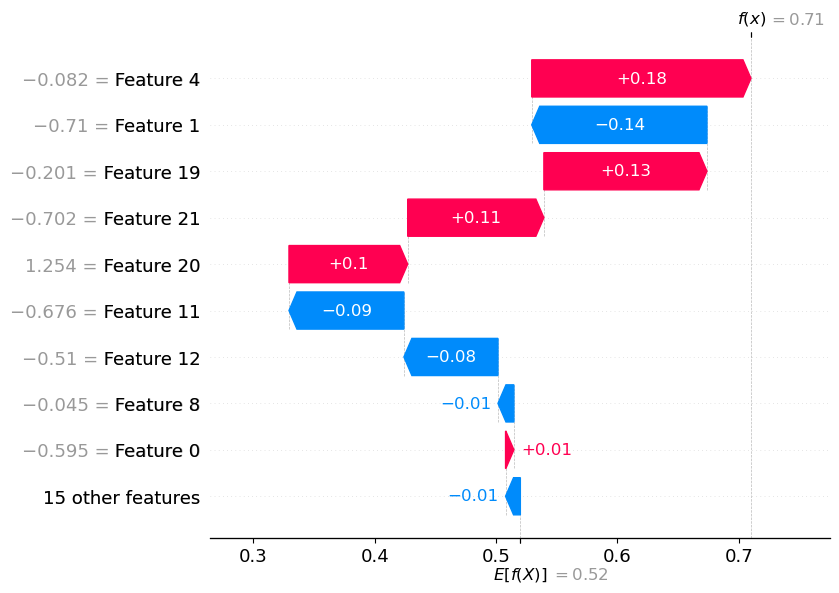

In [41]:
import shap
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Step 1: Resample and scale
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Step 2: Train XGBoost
model = XGBClassifier(**grid.best_params_, eval_metric='logloss', random_state=42)
model.fit(X_scaled, y_resampled)

# Step 3: Create SHAP explainer
explainer = shap.Explainer(model.predict, X_scaled)
shap_values = explainer(X_scaled)

# Step 4: Global summary plot (top features)
shap.summary_plot(shap_values, X_resampled, plot_type="bar")

# Step 5: Individual prediction explanation (e.g., index 0)
shap.plots.waterfall(shap_values[0])

C:\Users\NEWPC\AppData\Local\Temp\ipykernel_15692\3180961446.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_resampled, plot_type="bar", feature_names=X_selected.columns)


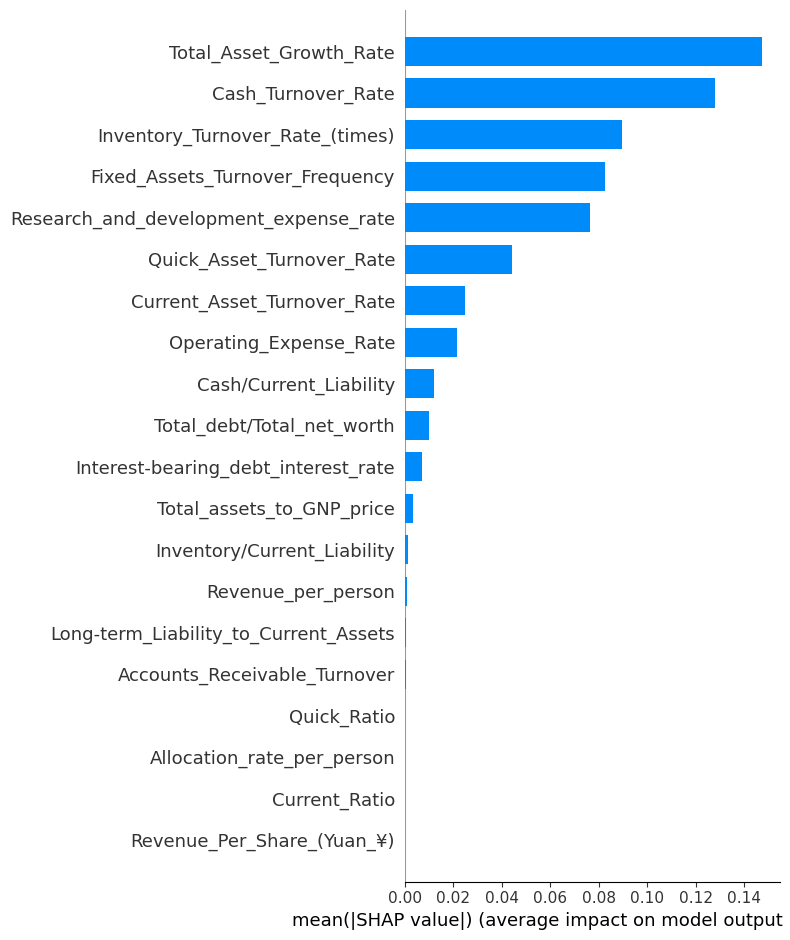

In [42]:
shap.summary_plot(shap_values, X_resampled, plot_type="bar", feature_names=X_selected.columns)

# starting with mutual information feature selection and SMOTE, we’ll train Logistic Regression (L1), XGBoost, and Random Forest, then compare their F1-score, recall, accuracy, and confusion matrices to identify the best model.


# Full Pipeline: 
1- Feature Selection → 
2- SMOTE 
3- Classifyers: Logistic Regression (L1), XGBoost  and Random Forest
4- Classifier Comparison


This is the feature selection method. It's designed to select the k features that score highest according to a specified scoring function.
This code performs filter-based feature selection to identify and keep the top 50 most informative features in your dataset.
It uses Mutual Information as a scoring metric to evaluate how strongly each feature relates to the target variable.

In [184]:
# Step 1: Feature Selection with Mutual Information

from sklearn.feature_selection import SelectKBest, mutual_info_classif

selector = SelectKBest(score_func=mutual_info_classif, k=50)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features.tolist())


Selected Features: ['ROA(C)_before_interest_and_depreciation_before_interest', 'ROA(A)_before_interest_and_%_after_tax', 'ROA(B)_before_interest_and_depreciation_after_tax', 'Operating_Gross_Margin', 'Realized_Sales_Gross_Margin', 'Operating_Profit_Rate', 'Pre-tax_net_Interest_Rate', 'After-tax_net_Interest_Rate', 'Non-industry_income_and_expenditure/revenue', 'Continuous_interest_rate_(after_tax)', 'Cash_flow_rate', 'Tax_rate_(A)', 'Net_Value_Per_Share_(B)', 'Net_Value_Per_Share_(A)', 'Net_Value_Per_Share_(C)', 'Persistent_EPS_in_the_Last_Four_Seasons', 'Operating_Profit_Per_Share_(Yuan_¥)', 'Per_Share_Net_profit_before_tax_(Yuan_¥)', 'After-tax_Net_Profit_Growth_Rate', 'Regular_Net_Profit_Growth_Rate', 'Total_Asset_Growth_Rate', 'Current_Ratio', 'Interest_Expense_Ratio', 'Debt_ratio_%', 'Net_worth/Assets', 'Long-term_fund_suitability_ratio_(A)', 'Borrowing_dependency', 'Operating_profit/Paid-in_capital', 'Net_profit_before_tax/Paid-in_capital', 'Operating_profit_per_person', 'Working

In [185]:
# Step 2: Apply SMOTE to Balance Classes

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)



c:\Users\NEWPC\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [186]:
# Step 3: Train-Test Split + Scalin

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Step 4: Train Models

# Step 4.1 : Logistic Regression (L1) Model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
lr.fit(X_train_scaled, y_train)



LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [188]:
# Step 4.2 : XGBoost Classifier Model

from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [189]:
# Step 4.3 : Random Forest Classifier Model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [191]:
# Step 5: Evaluate Model

from sklearn.metrics import classification_report, confusion_matrix

def evaluate(model, name):
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"{name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

evaluate(lr, "Logistic Regression")



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1320
           1       0.88      0.90      0.89      1320

    accuracy                           0.89      2640
   macro avg       0.89      0.89      0.89      2640
weighted avg       0.89      0.89      0.89      2640

Logistic Regression Confusion Matrix:
[[1166  154]
 [ 135 1185]]


In [192]:
evaluate(xgb, "XGBoost")



XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1320
           1       0.97      1.00      0.98      1320

    accuracy                           0.98      2640
   macro avg       0.98      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640

XGBoost Confusion Matrix:
[[1278   42]
 [   1 1319]]


In [193]:

evaluate(rf, "Random Forest")


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1320
           1       0.96      1.00      0.98      1320

    accuracy                           0.98      2640
   macro avg       0.98      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640

Random Forest Confusion Matrix:
[[1264   56]
 [   3 1317]]


# Model Comparison:


- Logistic regression: 
Accuracy = 0.89 -- F1-score-class_11= 0.89 -- Recall(class_1) = 0.90  -- False negatives = 135 -- FalsePositives = 154

- XBoost Classifier:
Accuracy = 0.98 -- F1-score-class_11= 0.98 -- Recall(class_1) = 1.00  -- False negatives = 1 -- FalsePositives = 42


- Random Forest Classifier:
Accuracy = 0.98 -- F1-score-class_11= 0.98 -- Recall(class_1) = 1.90  -- False negatives = 3 -- FalsePositives = 56


In conclusion: We can see that  that XBoost Classifier is the best model.
- Highest recall for minority class (bankrupt): Only 1 false negative — critical for early detection.
- Balanced precision and recall: Avoids overfitting while catching nearly all bankruptcies.
- Lowest total misclassifications: Just 43 errors out of 2640 samples.

Next Steps : Now that XGBoost is our top performer, we can:
- Tune hyperparameters with GridSearchCV or RandomizedSearchCV
- Build a full pipeline: SelectKBest → SMOTE → StandardScaler → XGBoost
- Apply SHAP for interpretability (global + individual predictions)
- Deploy with Flask + Docker + frontend
Would you like to proceed with hyperparameter tuning for XGBoost next? You're building a robust, interpretable, and deployable ML pipeline — and it's looking fantastic.





# Step-by-Step Hyperparameter Tuning for XGBoost

In [198]:
# Step-1: Define the Search Space

from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'scale_pos_weight': [1, 2, 5]  # Important for imbalance
}



In [199]:
# step-2. Run Randomized Search with Cross-Validation

xgb = XGBClassifier(eval_metric='logloss', random_state=42)

search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    scoring='f1',
    cv=5,
    n_iter=50,
    verbose=1,
    n_jobs=-1
)

search.fit(X_resampled, y_resampled)
print("Best Parameters:", search.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 0.6, 'scale_pos_weight': 1, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.8}


In [200]:
# Step-3: Retrain with Best Parameters

best_xgb = XGBClassifier(**search.best_params_, eval_metric='logloss', random_state=42)
best_xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [201]:
# step-4: Re-Evaluate and Compare

from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_xgb.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1320
           1       0.97      1.00      0.98      1320

    accuracy                           0.98      2640
   macro avg       0.98      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640

[[1273   47]
 [   1 1319]]


We can see that our tuned XGBoost model is performing exceptionally well compare to the base model

Interpretation
• 	Only 1 false negative: Our model is catching nearly every bankruptcy case — critical for risk prediction.
• 	High precision and recall: Balanced performance, no overfitting to minority class.
• 	Low false positives (47): Minimal misclassification of healthy companies.



# Full ML Pipeline: Feature Selection → SMOTE → Scaling → XGBoost

In [203]:
# Step-1: Import Required Modules

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier